Substructure search results:
                                                 SMILES  Match
0       CCCC(NC(c(cc1)ccc1OC)c(c1ccccc1cc1)c1OC(C)=O)=O  False
1                  O=C(CC1c2cccc(Br)c2)Nc2c1c1ccccc1cc2  False
2                     Cc(cc1)cc2c1Oc(cccc1)c1C=C2C(O)=O  False
3         CC(C)(C(C=C1)(N2c3ccccc3)Oc(cc3)c1cc3Br)OC2=O  False
4                 CC(C)CCn1c(NCCO)nc(N(C)C(N2)=O)c1C2=O  False
...                                                 ...    ...
6499               Cn1c(Nc2ccccc2)nc(N(C)C(N2)=O)c1C2=O  False
6500            Cc(nc1C(N)=O)nc(N2c3cc(C#N)ccc3)c1NC2=O  False
6501    Cc(occ1)c1-c(n1CC2OCCC2)nnc1SCC(c(cc1)ccc1Cl)=O  False
6502         Cc1c(/C=N/C2(CC2)c(cc2)ccc2Cl)n(cccc2)c2n1  False
6503  CC(C)(C)c1ccc(Cn(c2nc(C(CC3)CCN3C(c3ccco3)=O)n...  False

[6504 rows x 2 columns]
Substructure search results saved to substructure_search_results.csv


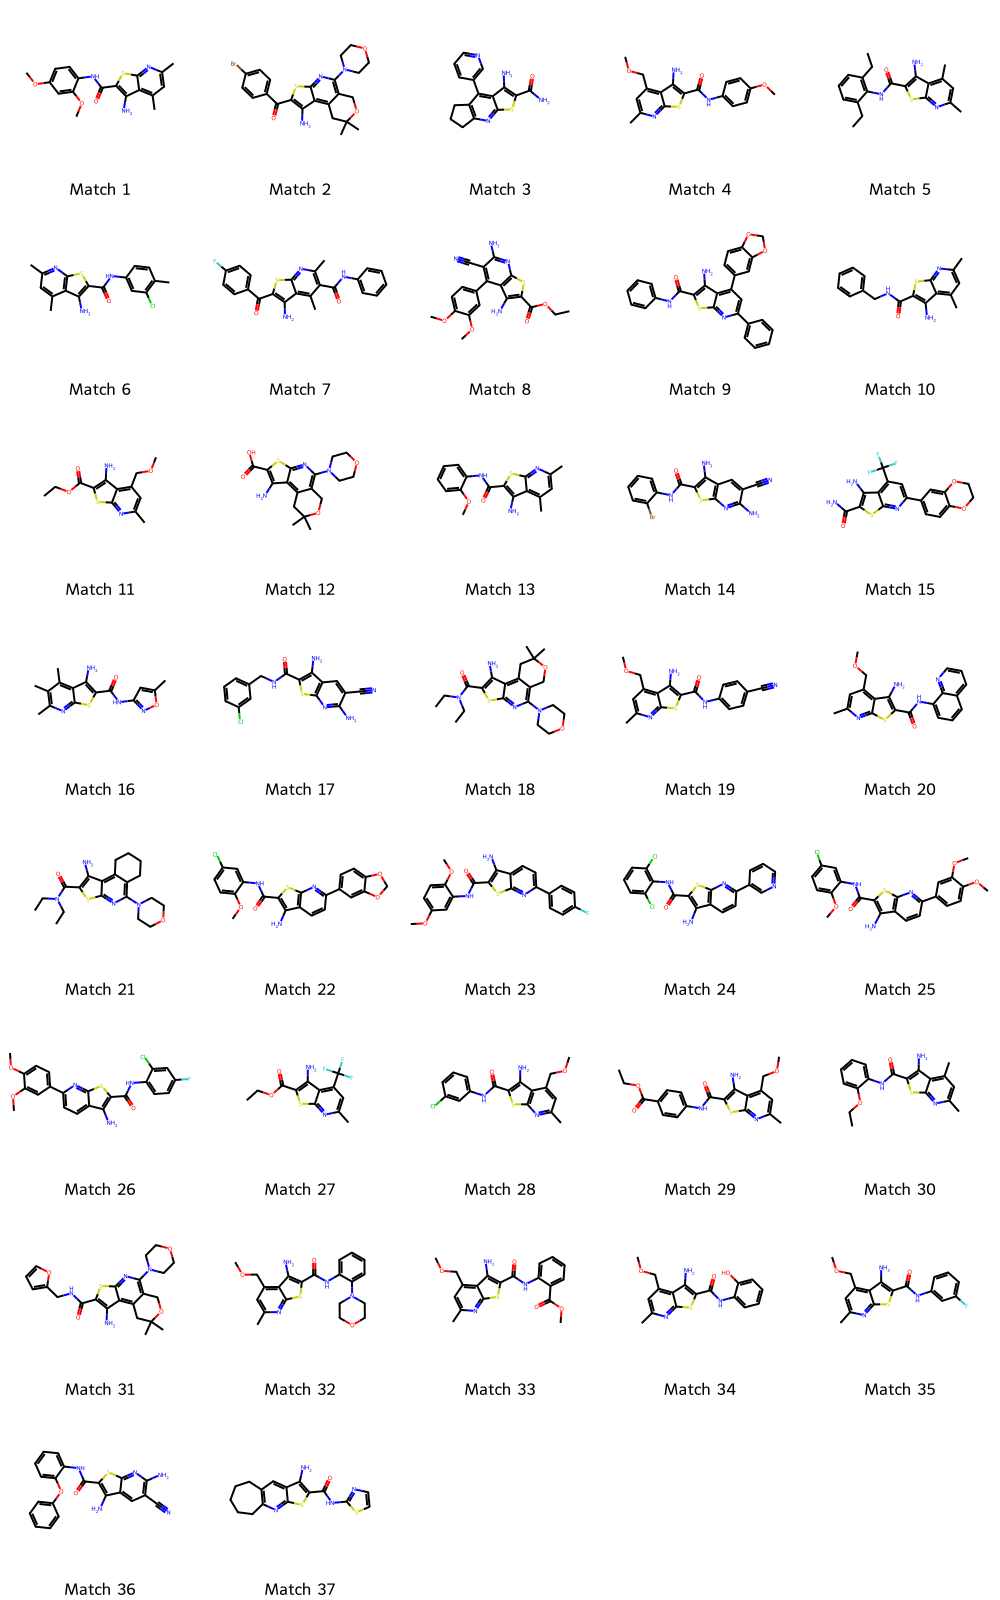

In [4]:
# Import necessary libraries
from rdkit import Chem
from rdkit.Chem import Draw
import pandas as pd

# Function to read SMILES from a CSV file
def read_smiles_from_csv(file_path):
    df = pd.read_csv(file_path)
    if 'SMILES' not in df.columns:
        raise ValueError("CSV file must contain a 'SMILES' column")
    return df['SMILES'].tolist()

# Function to perform substructure search
def substructure_search(molecules, substructure_smarts):
    substructure = Chem.MolFromSmarts(substructure_smarts)
    if not substructure:
        raise ValueError("Invalid substructure SMARTS.")
    
    matches = []
    for mol in molecules:
        if mol.HasSubstructMatch(substructure):
            matches.append(True)
        else:
            matches.append(False)
    return matches

# Read SMILES from a CSV file
csv_file = 'asinex.csv'  # Update with your CSV file path
smiles_list = read_smiles_from_csv(csv_file)

# Convert SMILES to RDKit molecule objects
molecules = [Chem.MolFromSmiles(smile) for smile in smiles_list]

# Define the substructure SMARTS (example: benzene ring)
substructure_smarts = 'c1cc2cccnc2s1'

# Perform substructure search
matches = substructure_search(molecules, substructure_smarts)

# Combine SMILES and match results into a DataFrame
results = pd.DataFrame(list(zip(smiles_list, matches)), columns=["SMILES", "Match"])
print(f"Substructure search results:\n{results}")

# Save the substructure search results to a CSV file
output_csv_file = 'substructure_search_results.csv'
results.to_csv(output_csv_file, index=False)
print(f"Substructure search results saved to {output_csv_file}")

# Optionally, display the matched molecules
matched_molecules = [molecules[i] for i, match in enumerate(matches) if match]
if matched_molecules:
    img = Draw.MolsToGridImage(matched_molecules, molsPerRow=5, subImgSize=(200, 200), legends=[f"Match {i+1}" for i in range(len(matched_molecules))])
    display(img)
else:
    print("No matches found.")
